##### Steps for reading in dataset (following download), initial QC, dim reduction/clustering and saving out the myeloid cluster for **GSE169246**

file previously downloaded:
* GSE169246_TNBC_RNA.barcode.tsv.gz
* GSE169246_TNBC_RNA.counts.tsv.gz
* GSE169246_TNBC_RNA.feature.tsv.gz

Renamed to correct standard

Dataset is meant to contain primary, metastatic and PBMC data from 22 patients with TNBC before and after anti-PDL1 treatment. 
Will need to read in first and see if there is any metadata to distinguish patients

In [2]:
#set wd
getwd()
setwd('/scratch/user/s4436039/scdata/GSE169246')
getwd()

[1] "/scratch/user/s4436039/Nikita-project"

[1] "/scratch/user/s4436039/scdata/GSE169246"

In [3]:
#Load packages
library(dplyr)
library(Seurat)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect




In [4]:
#load all datasets
TNBC.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE169246", gene.column=1) 

In [5]:
head(colnames(TNBC.data))

[1] "AAACCTGAGGTTACCT.Pre_P007_b" "AAACCTGCAAAGGAAG.Pre_P007_b"
[3] "AAACCTGCAAGTCTAC.Pre_P007_b" "AAACCTGCAATAAGCA.Pre_P007_b"
[5] "AAACCTGCACAGCGTC.Pre_P007_b" "AAACCTGCAGCTATTG.Pre_P007_b"

In [6]:
#Add dataset info to colnames
colnames(TNBC.data) <- paste0("GSE169246_TNBC_", colnames(TNBC.data))

In [7]:
head(colnames(TNBC.data))

[1] "GSE169246_TNBC_AAACCTGAGGTTACCT.Pre_P007_b"
[2] "GSE169246_TNBC_AAACCTGCAAAGGAAG.Pre_P007_b"
[3] "GSE169246_TNBC_AAACCTGCAAGTCTAC.Pre_P007_b"
[4] "GSE169246_TNBC_AAACCTGCAATAAGCA.Pre_P007_b"
[5] "GSE169246_TNBC_AAACCTGCACAGCGTC.Pre_P007_b"
[6] "GSE169246_TNBC_AAACCTGCAGCTATTG.Pre_P007_b"

In [8]:
#create seperate seurat object for each sample
TNBC <- CreateSeuratObject(counts = TNBC.data, project = "GSE169246", min.features = 200)

In [9]:
head(TNBC@meta.data)

orig.ident nCount_RNA nFeature_RNA
GSE169246_TNBC_AAACCTGAGGTTACCT.Pre_P007_b GSE169246  1769        818        
GSE169246_TNBC_AAACCTGCAAAGGAAG.Pre_P007_b GSE169246  3037        892        
GSE169246_TNBC_AAACCTGCAAGTCTAC.Pre_P007_b GSE169246  1117        597        
GSE169246_TNBC_AAACCTGCAATAAGCA.Pre_P007_b GSE169246  1750        757        
GSE169246_TNBC_AAACCTGCACAGCGTC.Pre_P007_b GSE169246   652        470        
GSE169246_TNBC_AAACCTGCAGCTATTG.Pre_P007_b GSE169246  4638       1444

#### here onwards not edited

In [ ]:
#add metadata to sample
TNBC@meta.data$sample_type <- "tumour"
TNBC@meta.data$cancer_type <- "TNBC"
TNBC@meta.data$patient_id <- "TNBC"
TNBC@meta.data$sample_id <- "GSE199515_TNBC"

In [11]:
head(TNBC1@meta.data) 
head(TNBC2@meta.data) 
head(TNBC3@meta.data) 

orig.ident nCount_RNA nFeature_RNA
GSE199515_TNBC1_AAACCTGCACGGATAG-1 GSE199515   3229      1175        
GSE199515_TNBC1_AAACCTGGTAGCTGCC-1 GSE199515   3784      1326        
GSE199515_TNBC1_AAACCTGGTTAAGGGC-1 GSE199515   3929      1466        
GSE199515_TNBC1_AAACGGGCAGACAAAT-1 GSE199515   3511      1323        
GSE199515_TNBC1_AAACGGGTCGTAGGTT-1 GSE199515   3356      1058        
GSE199515_TNBC1_AAACGGGTCTGAAAGA-1 GSE199515  13527      2263        
                                   sample_type cancer_type patient_id
GSE199515_TNBC1_AAACCTGCACGGATAG-1 tumour      TNBC        TNBC1     
GSE199515_TNBC1_AAACCTGGTAGCTGCC-1 tumour      TNBC        TNBC1     
GSE199515_TNBC1_AAACCTGGTTAAGGGC-1 tumour      TNBC        TNBC1     
GSE199515_TNBC1_AAACGGGCAGACAAAT-1 tumour      TNBC        TNBC1     
GSE199515_TNBC1_AAACGGGTCGTAGGTT-1 tumour      TNBC        TNBC1     
GSE199515_TNBC1_AAACGGGTCTGAAAGA-1 tumour      TNBC        TNBC1     
                                   sample_id      
GSE199515_TNBC1_AAACCTGCACGGATAG-1 GSE199515_TNBC1
GSE199515_TNBC1_AAACCTGGTAGCTGCC-1 GSE199515_TNBC1
GSE199515_TNBC1_AAACCTGGTTAAGGGC-1 GSE199515_TNBC1
GSE199515_TNBC1_AAACGGGCAGACAAAT-1 GSE199515_TNBC1
GSE199515_TNBC1_AAACGGGTCGTAGGTT-1 GSE199515_TNBC1
GSE199515_TNBC1_AAACGGGTCTGAAAGA-1 GSE199515_TNBC1

orig.ident nCount_RNA nFeature_RNA
GSE199515_TNBC2_AAACCTGAGAGTTGGC-1 GSE199515   8300      2389        
GSE199515_TNBC2_AAACCTGCAAGCGATG-1 GSE199515   9159      2262        
GSE199515_TNBC2_AAACCTGCACTAAGTC-1 GSE199515  30021      4918        
GSE199515_TNBC2_AAACCTGGTTTACTCT-1 GSE199515   6343      1642        
GSE199515_TNBC2_AAACCTGTCGGTGTCG-1 GSE199515  12422      2920        
GSE199515_TNBC2_AAACCTGTCGTTTAGG-1 GSE199515   5841      1667        
                                   sample_type cancer_type patient_id
GSE199515_TNBC2_AAACCTGAGAGTTGGC-1 tumour      TNBC        TNBC2     
GSE199515_TNBC2_AAACCTGCAAGCGATG-1 tumour      TNBC        TNBC2     
GSE199515_TNBC2_AAACCTGCACTAAGTC-1 tumour      TNBC        TNBC2     
GSE199515_TNBC2_AAACCTGGTTTACTCT-1 tumour      TNBC        TNBC2     
GSE199515_TNBC2_AAACCTGTCGGTGTCG-1 tumour      TNBC        TNBC2     
GSE199515_TNBC2_AAACCTGTCGTTTAGG-1 tumour      TNBC        TNBC2     
                                   sample_id      
GSE199515_TNBC2_AAACCTGAGAGTTGGC-1 GSE199515_TNBC2
GSE199515_TNBC2_AAACCTGCAAGCGATG-1 GSE199515_TNBC2
GSE199515_TNBC2_AAACCTGCACTAAGTC-1 GSE199515_TNBC2
GSE199515_TNBC2_AAACCTGGTTTACTCT-1 GSE199515_TNBC2
GSE199515_TNBC2_AAACCTGTCGGTGTCG-1 GSE199515_TNBC2
GSE199515_TNBC2_AAACCTGTCGTTTAGG-1 GSE199515_TNBC2

orig.ident nCount_RNA nFeature_RNA
GSE199515_TNBC3_AAACCTGAGCGCCTTG-1 GSE199515  17251      3645        
GSE199515_TNBC3_AAAGATGCAATCGGTT-1 GSE199515  12511      3251        
GSE199515_TNBC3_AAAGATGGTACCGAGA-1 GSE199515   4362      1507        
GSE199515_TNBC3_AAAGCAACATTTGCCC-1 GSE199515   3191      1343        
GSE199515_TNBC3_AAAGCAAGTACAAGTA-1 GSE199515  11312      3762        
GSE199515_TNBC3_AAAGTAGGTACAGTGG-1 GSE199515   3873      1087        
                                   sample_type cancer_type patient_id
GSE199515_TNBC3_AAACCTGAGCGCCTTG-1 tumour      TNBC        TNBC3     
GSE199515_TNBC3_AAAGATGCAATCGGTT-1 tumour      TNBC        TNBC3     
GSE199515_TNBC3_AAAGATGGTACCGAGA-1 tumour      TNBC        TNBC3     
GSE199515_TNBC3_AAAGCAACATTTGCCC-1 tumour      TNBC        TNBC3     
GSE199515_TNBC3_AAAGCAAGTACAAGTA-1 tumour      TNBC        TNBC3     
GSE199515_TNBC3_AAAGTAGGTACAGTGG-1 tumour      TNBC        TNBC3     
                                   sample_id      
GSE199515_TNBC3_AAACCTGAGCGCCTTG-1 GSE199515_TNBC3
GSE199515_TNBC3_AAAGATGCAATCGGTT-1 GSE199515_TNBC3
GSE199515_TNBC3_AAAGATGGTACCGAGA-1 GSE199515_TNBC3
GSE199515_TNBC3_AAAGCAACATTTGCCC-1 GSE199515_TNBC3
GSE199515_TNBC3_AAAGCAAGTACAAGTA-1 GSE199515_TNBC3
GSE199515_TNBC3_AAAGTAGGTACAGTGG-1 GSE199515_TNBC3

In [12]:
#Merge seurat objects
TNBC <- merge(TNBC1, y = c(TNBC2, TNBC3), project = "GSE199515")

In [13]:
TNBC
head(TNBC@meta.data)
tail(TNBC@meta.data)

An object of class Seurat 
33694 features across 9206 samples within 1 assay 
Active assay: RNA (33694 features, 0 variable features)
 3 layers present: counts.1, counts.2, counts.3

orig.ident nCount_RNA nFeature_RNA
GSE199515_TNBC1_AAACCTGCACGGATAG-1 GSE199515   3229      1175        
GSE199515_TNBC1_AAACCTGGTAGCTGCC-1 GSE199515   3784      1326        
GSE199515_TNBC1_AAACCTGGTTAAGGGC-1 GSE199515   3929      1466        
GSE199515_TNBC1_AAACGGGCAGACAAAT-1 GSE199515   3511      1323        
GSE199515_TNBC1_AAACGGGTCGTAGGTT-1 GSE199515   3356      1058        
GSE199515_TNBC1_AAACGGGTCTGAAAGA-1 GSE199515  13527      2263        
                                   sample_type cancer_type patient_id
GSE199515_TNBC1_AAACCTGCACGGATAG-1 tumour      TNBC        TNBC1     
GSE199515_TNBC1_AAACCTGGTAGCTGCC-1 tumour      TNBC        TNBC1     
GSE199515_TNBC1_AAACCTGGTTAAGGGC-1 tumour      TNBC        TNBC1     
GSE199515_TNBC1_AAACGGGCAGACAAAT-1 tumour      TNBC        TNBC1     
GSE199515_TNBC1_AAACGGGTCGTAGGTT-1 tumour      TNBC        TNBC1     
GSE199515_TNBC1_AAACGGGTCTGAAAGA-1 tumour      TNBC        TNBC1     
                                   sample_id      
GSE199515_TNBC1_AAACCTGCACGGATAG-1 GSE199515_TNBC1
GSE199515_TNBC1_AAACCTGGTAGCTGCC-1 GSE199515_TNBC1
GSE199515_TNBC1_AAACCTGGTTAAGGGC-1 GSE199515_TNBC1
GSE199515_TNBC1_AAACGGGCAGACAAAT-1 GSE199515_TNBC1
GSE199515_TNBC1_AAACGGGTCGTAGGTT-1 GSE199515_TNBC1
GSE199515_TNBC1_AAACGGGTCTGAAAGA-1 GSE199515_TNBC1

orig.ident nCount_RNA nFeature_RNA
GSE199515_TNBC3_TTTCCTCAGGGCTCTC-1 GSE199515  20993      4410        
GSE199515_TNBC3_TTTGCGCAGAGCCTAG-1 GSE199515   9257      2287        
GSE199515_TNBC3_TTTGCGCTCACCTCGT-1 GSE199515   2983      1138        
GSE199515_TNBC3_TTTGCGCTCCTTTCGG-1 GSE199515  21897      4849        
GSE199515_TNBC3_TTTGGTTGTGATAAGT-1 GSE199515   3162      1387        
GSE199515_TNBC3_TTTGGTTTCCACGAAT-1 GSE199515  24620      4983        
                                   sample_type cancer_type patient_id
GSE199515_TNBC3_TTTCCTCAGGGCTCTC-1 tumour      TNBC        TNBC3     
GSE199515_TNBC3_TTTGCGCAGAGCCTAG-1 tumour      TNBC        TNBC3     
GSE199515_TNBC3_TTTGCGCTCACCTCGT-1 tumour      TNBC        TNBC3     
GSE199515_TNBC3_TTTGCGCTCCTTTCGG-1 tumour      TNBC        TNBC3     
GSE199515_TNBC3_TTTGGTTGTGATAAGT-1 tumour      TNBC        TNBC3     
GSE199515_TNBC3_TTTGGTTTCCACGAAT-1 tumour      TNBC        TNBC3     
                                   sample_id      
GSE199515_TNBC3_TTTCCTCAGGGCTCTC-1 GSE199515_TNBC3
GSE199515_TNBC3_TTTGCGCAGAGCCTAG-1 GSE199515_TNBC3
GSE199515_TNBC3_TTTGCGCTCACCTCGT-1 GSE199515_TNBC3
GSE199515_TNBC3_TTTGCGCTCCTTTCGG-1 GSE199515_TNBC3
GSE199515_TNBC3_TTTGGTTGTGATAAGT-1 GSE199515_TNBC3
GSE199515_TNBC3_TTTGGTTTCCACGAAT-1 GSE199515_TNBC3

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


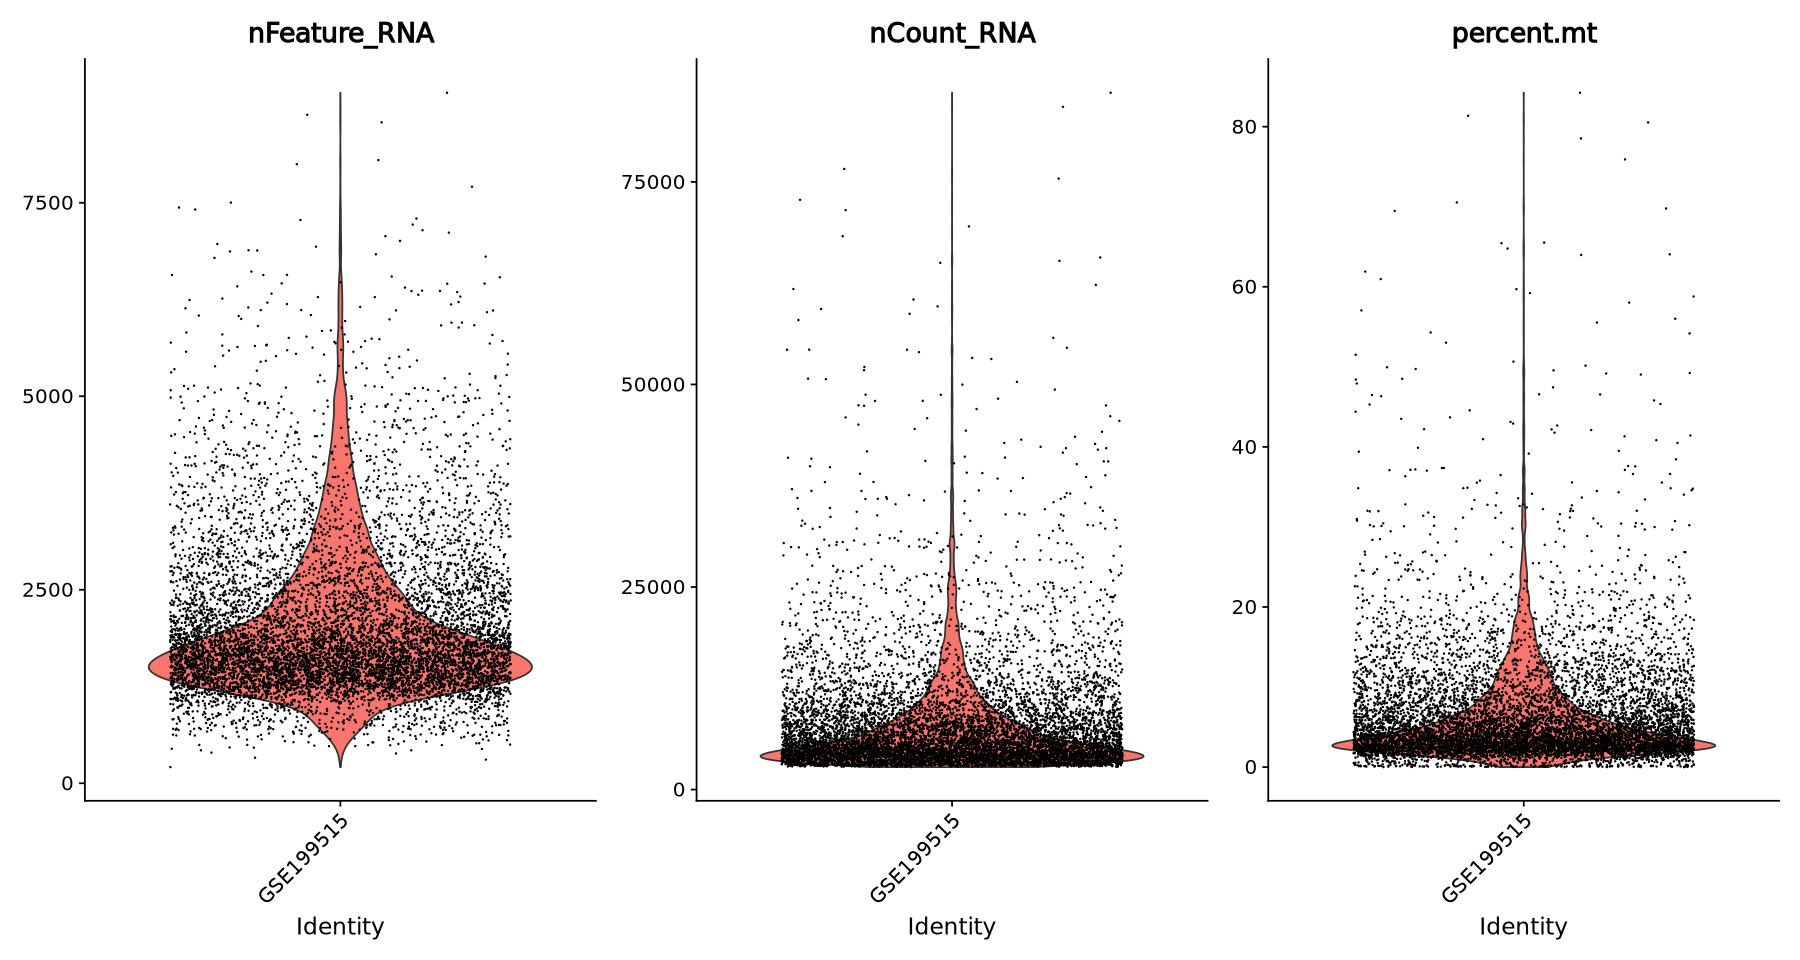

In [14]:
#QC Steps 
TNBC[["percent.mt"]] <- PercentageFeatureSet(TNBC, pattern = "^MT-")
#Visualise QC metrics
options(repr.plot.height=8, repr.plot.width=15)
VlnPlot(TNBC, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

In [15]:
#Normalise the data
TNBC <- NormalizeData(TNBC)

Normalizing layer: counts.1



Normalizing layer: counts.2

Normalizing layer: counts.3



In [16]:
#Find variable features
TNBC <- FindVariableFeatures(TNBC, selection.method = "vst", nfeatures = 2000)

Finding variable features for layer counts.1

Finding variable features for layer counts.2

Finding variable features for layer counts.3



In [17]:
#Scale the data
TNBC <- ScaleData(TNBC, vars.to.regress = c("percent.mt", "nCount_RNA"))

Regressing out percent.mt, nCount_RNA

Centering and scaling data matrix



In [18]:
#Run PCA
TNBC <- RunPCA(TNBC, features = VariableFeatures(object = TNBC))

PC_ 1 
Positive:  COL1A2, SPARC, COL3A1, DCN, COL1A1, COL6A3, COL6A2, LUM, FSTL1, PCOLCE 
	   IGFBP4, C1S, SERPING1, CXCL12, THY1, COL6A1, RARRES2, C1R, CALD1, MEG3 
	   IGF1, CTSK, SERPINF1, TIMP1, LHFP, CTGF, CCDC80, SFRP2, VCAN, TCF4 
Negative:  CD24, KRT18, KRT19, KRT8, TM4SF1, CLDN4, AZGP1, FXYD3, SPINT2, TSTD1 
	   KRT15, DSP, DBI, ELF3, EZR, CLDN7, KRT7, KRT23, MGST1, AREG 
	   TACSTD2, PERP, SLPI, S100A14, CALML5, CLDN3, CCL28, PDZK1IP1, S100A1, HMGA1 
PC_ 2 
Positive:  CD24, MGP, CRABP2, SOX4, KRT8, KRT19, KRT18, AZGP1, CLDN4, APOD 
	   FXYD3, MGST1, SFRP1, MDK, DCN, LUM, SELM, MEG3, PERP, COL1A1 
	   SFRP2, CYR61, C1S, ELF3, IGF1, CRABP1, COL1A2, SRPX, COL3A1, FBLN1 
Negative:  HLA-DRB1, HLA-DPA1, SRGN, HLA-DRA, CD74, HLA-DPB1, TYROBP, FCER1G, LAPTM5, HLA-DQA1 
	   HLA-DQB1, AIF1, HLA-DMA, LYZ, C1QB, PLEK, CTSS, C1QA, MS4A6A, C1QC 
	   RNASE1, C1orf162, RGS1, GPR183, HLA-DMB, LST1, FCGR2A, MS4A7, FCGR3A, B2M 
PC_ 3 
Positive:  ADGRL4, PLVAP, VWF, EMCN, SDPR, ESAM, RAMP3, ECSC

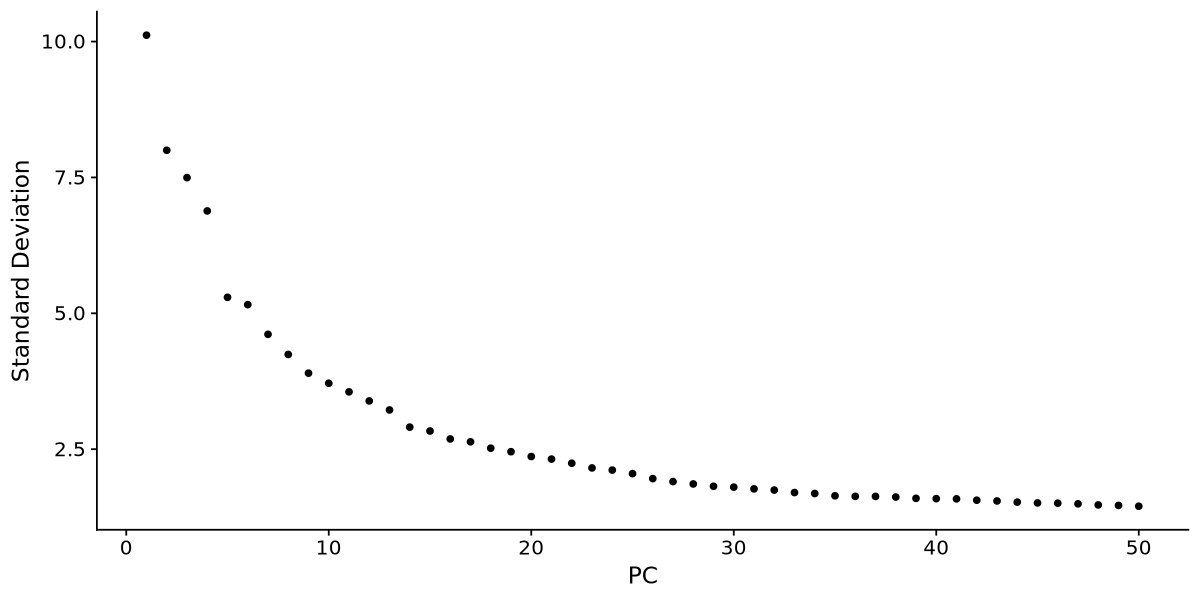

In [19]:
#make elbow plot
options(repr.plot.height=5, repr.plot.width=10)
ElbowPlot(TNBC, ndims=50)
#in GSE213243 decided to use 40 PC, staying consistent across datasets

In [20]:
#Find neighbours (make sure number matches no. features chosen above)
TNBC <- FindNeighbors(TNBC, dims = 1:40)

Computing nearest neighbor graph



Computing SNN



In [21]:
#Run UMAP
TNBC <- RunUMAP(TNBC, dims = 1:40)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


13:15:21 UMAP embedding parameters a = 0.9922 b = 1.112

13:15:21 Read 9206 rows and found 40 numeric columns

13:15:21 Using Annoy for neighbor search, n_neighbors = 30

13:15:21 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

13:15:22 Writing NN index file to temp file /scratch/temp/9601611/RtmpPdMrM7/filef42a14ed069a0

13:15:22 Searching Annoy index using 1 thread, search_k = 3000

13:15:24 Annoy recall = 100%

13:15:24 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

13:15:25 Initializing from normalized Laplacian + noise (using RSpectra)

13:15:25 Commencing optimization for 500 epochs, with 395760 positive edges

13:15:35 Optimization finished



In [22]:
#Cluster, resolution here set to 0.2
TNBC <- FindClusters(TNBC, resolution = 0.2)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 9206
Number of edges: 343023

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9658
Number of communities: 12
Elapsed time: 0 seconds


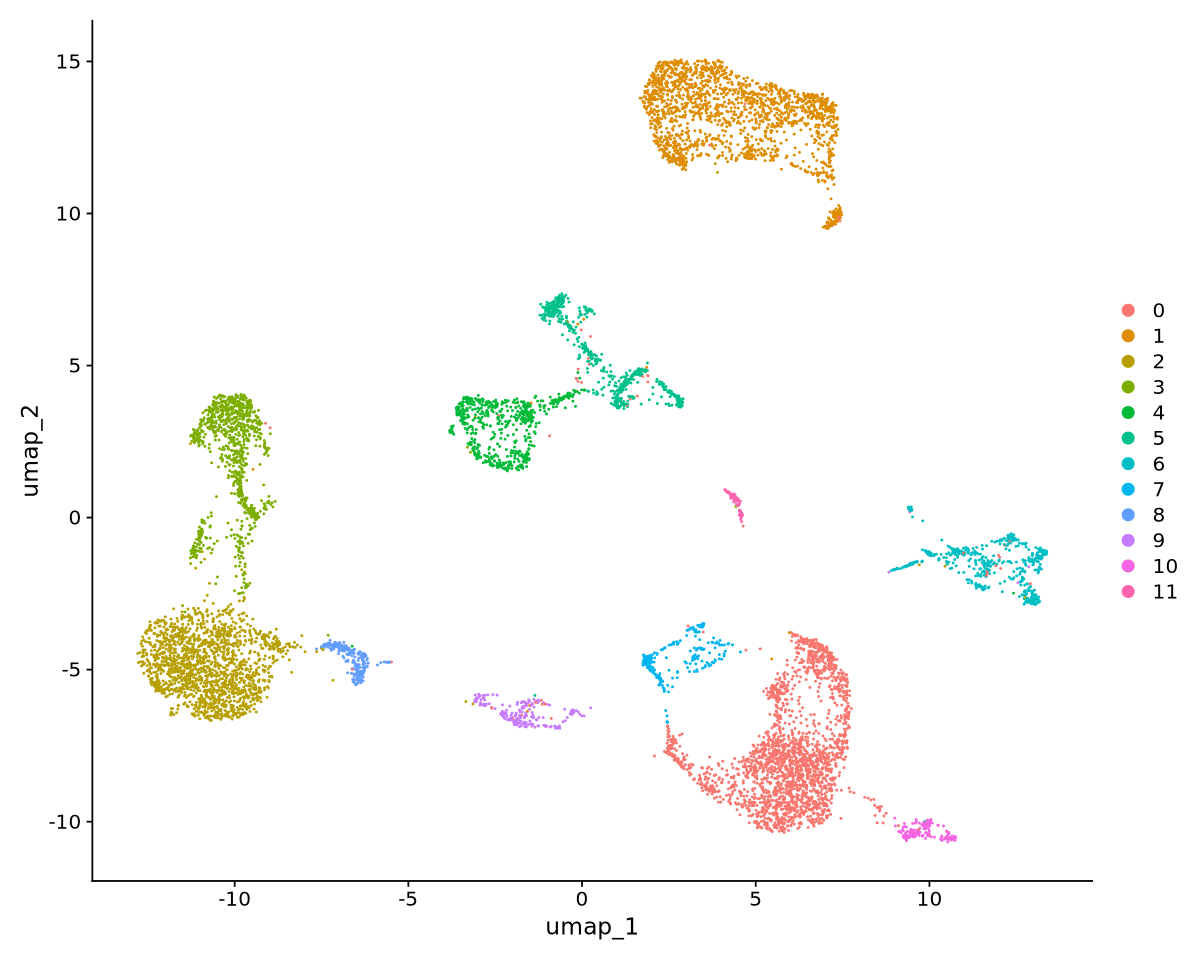

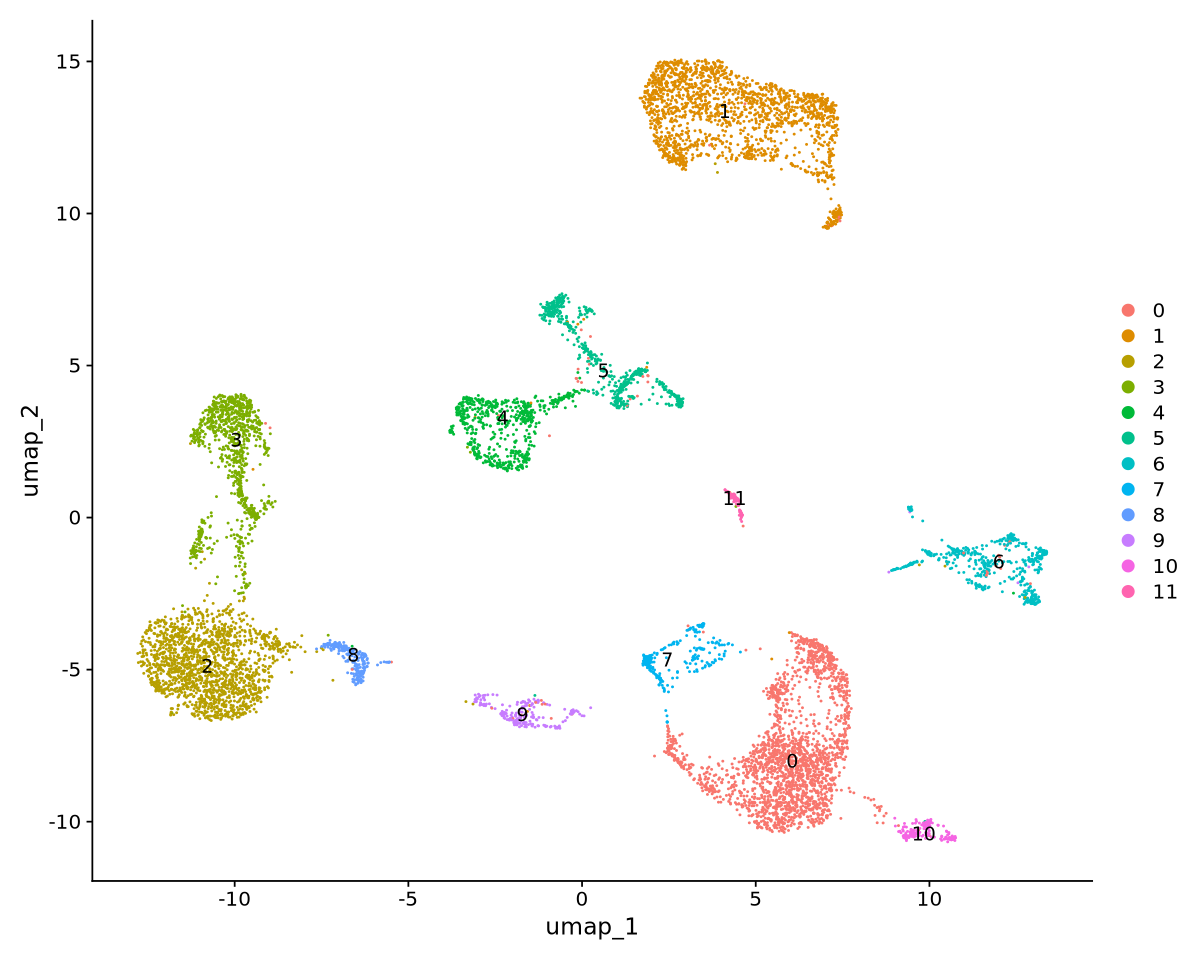

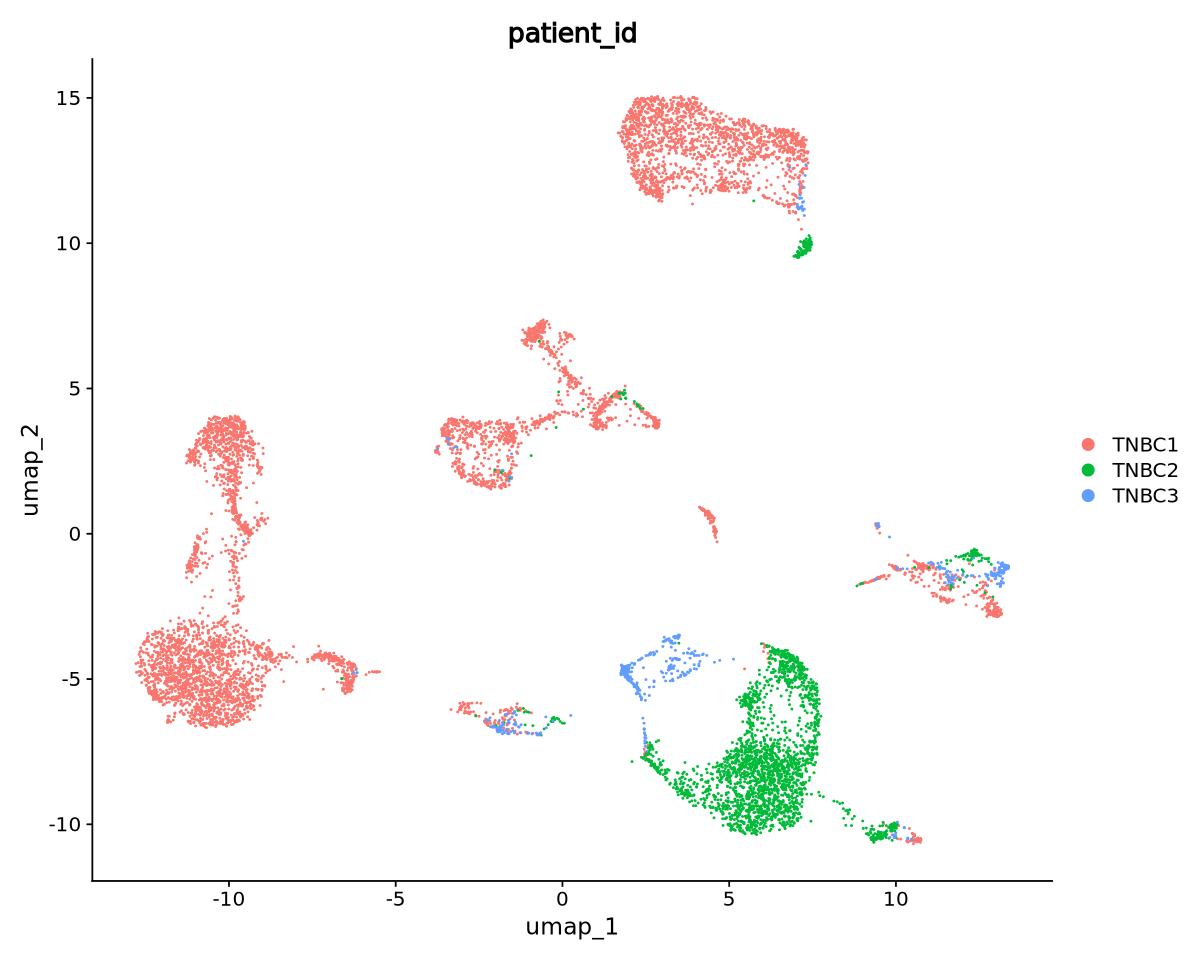

In [23]:
#Plot UMAP
options(repr.plot.height=8, repr.plot.width=10)
DimPlot(TNBC, reduction = "umap")
DimPlot(TNBC, reduction = "umap", label=TRUE)
DimPlot(TNBC, reduction = "umap", group = "patient_id")

Note samples are seperating a lot by patient, keep in mind below

In [24]:
#Save the object at this point so it can be loaded in without running steps above
saveRDS(TNBC, file = "/scratch/user/s4436039/scdata/GSE199515/GSE199515.RDS")

#### Next part of code is about determining which cluster is the myeloid cells

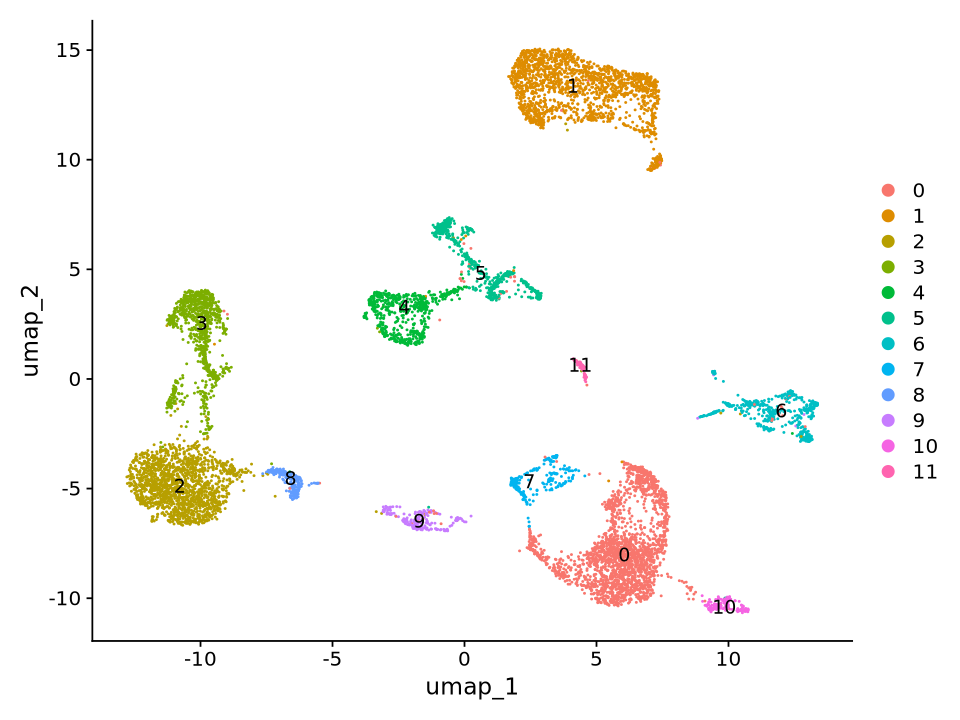

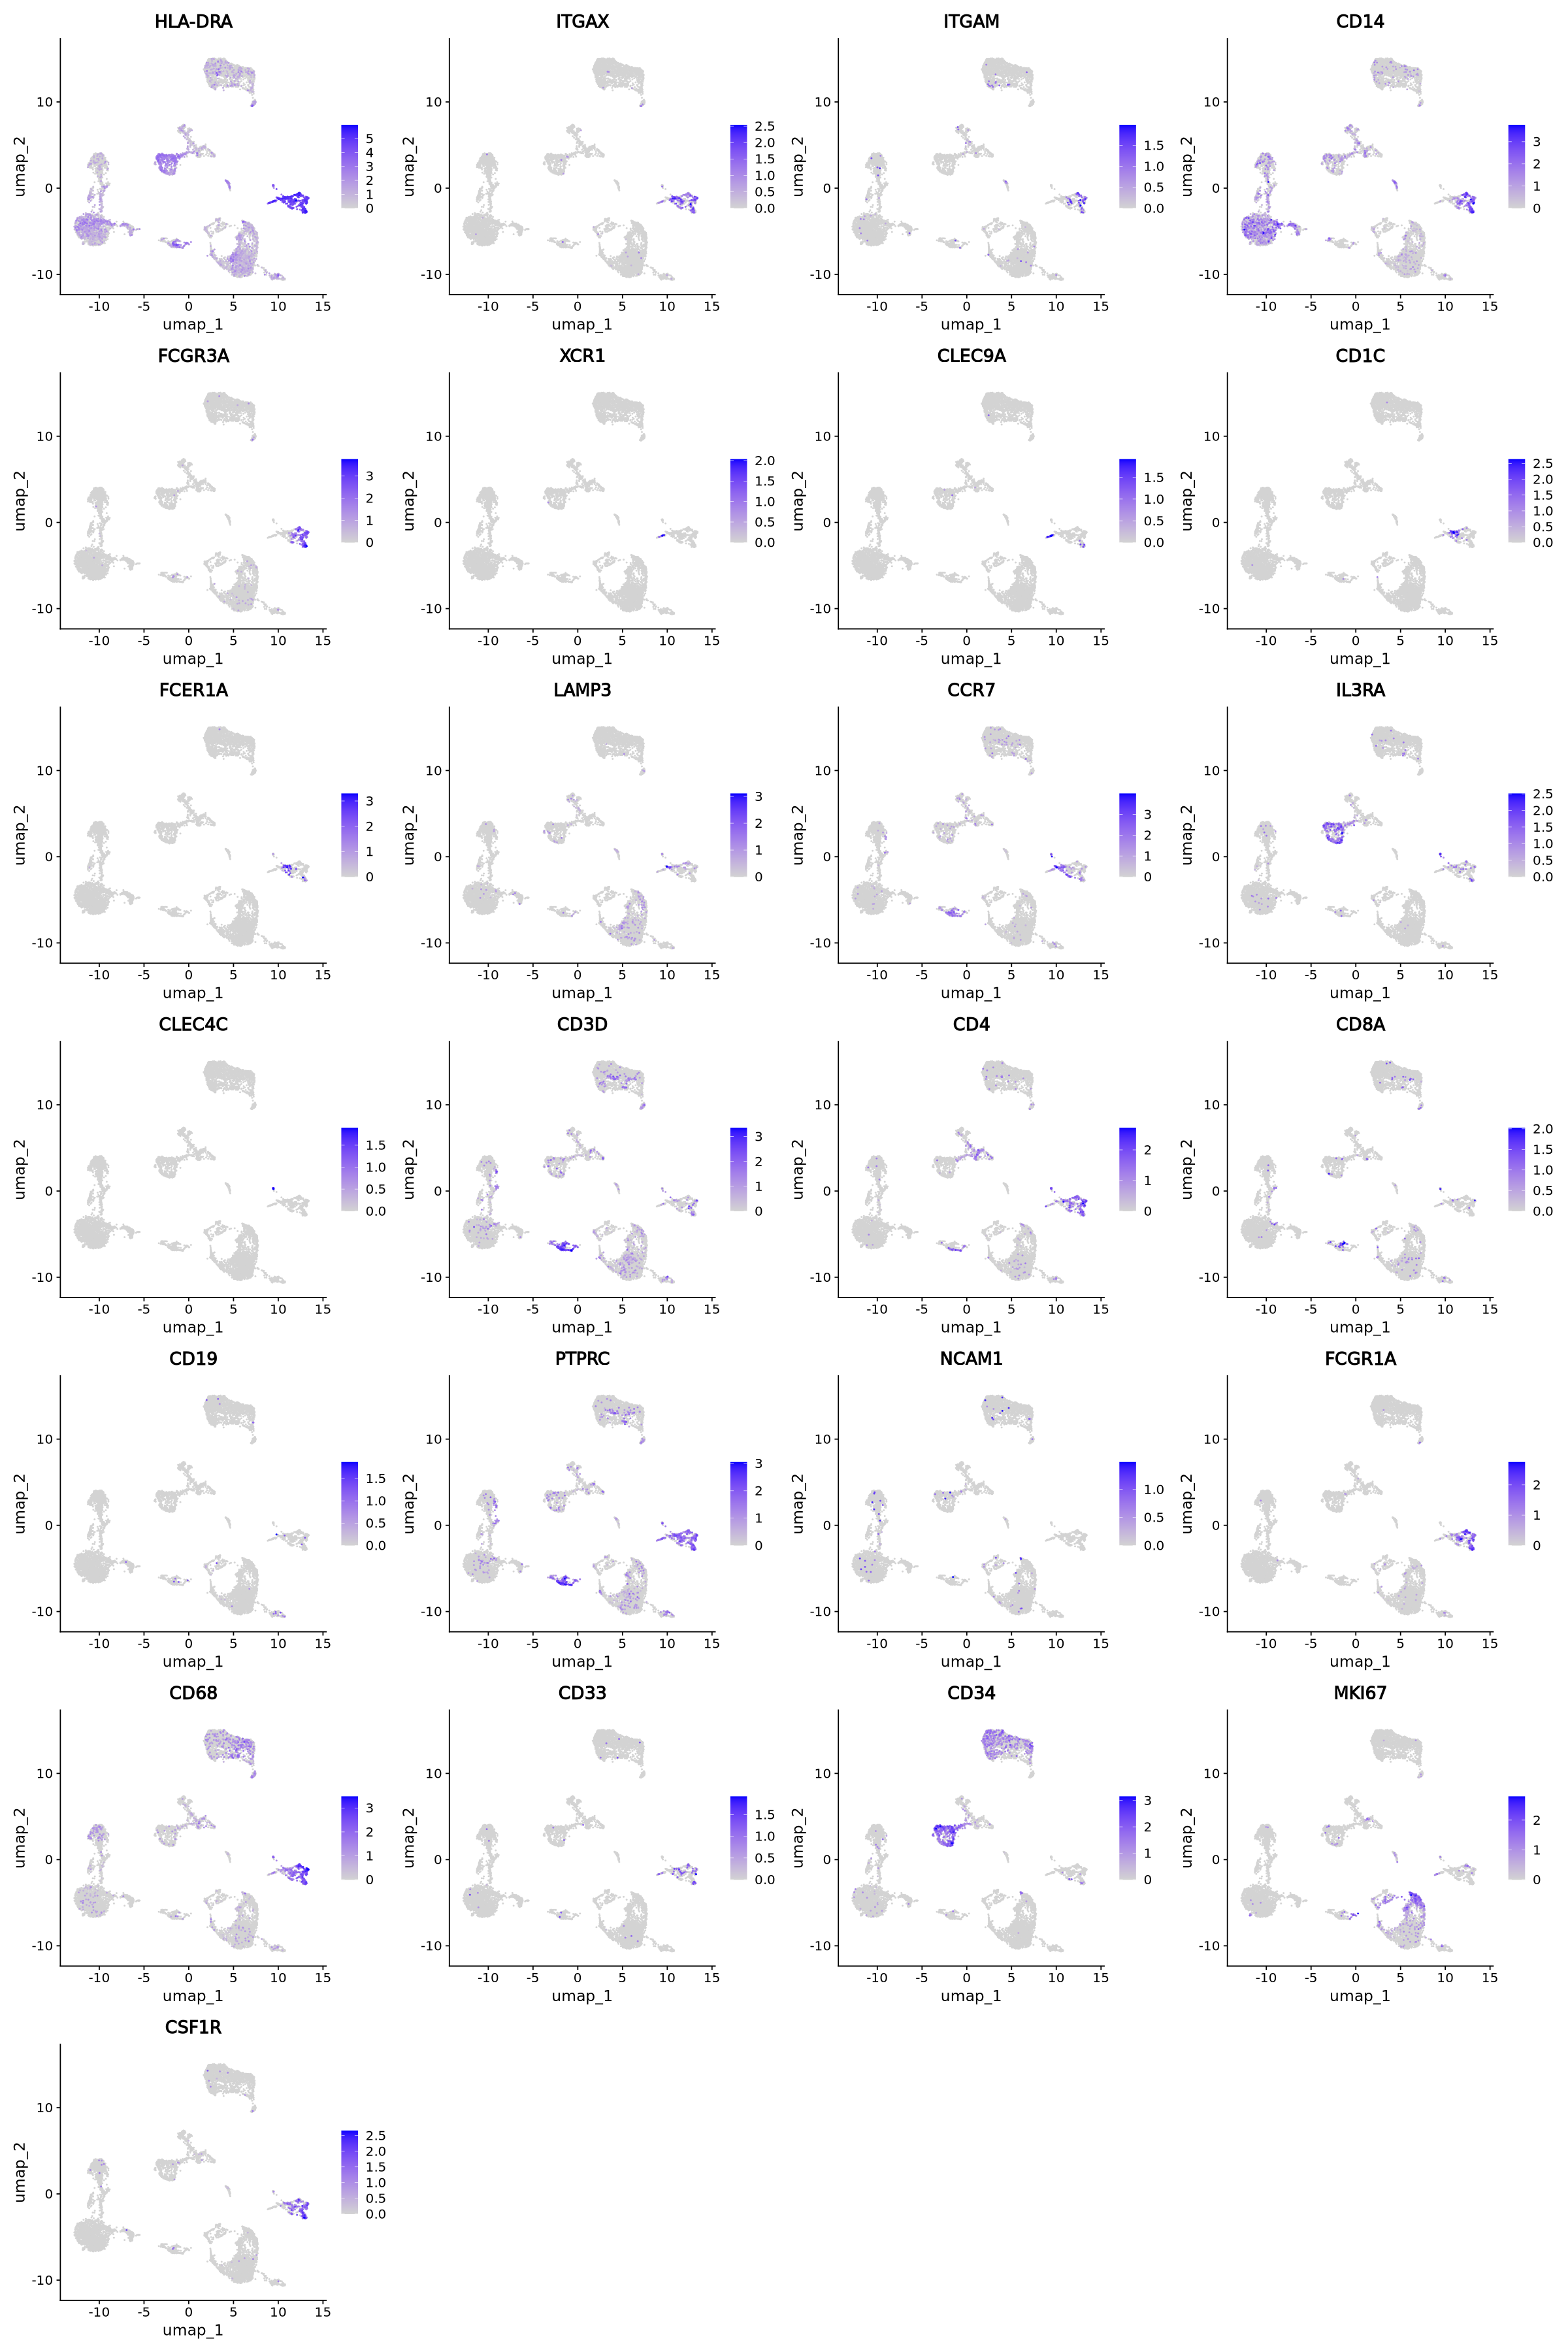

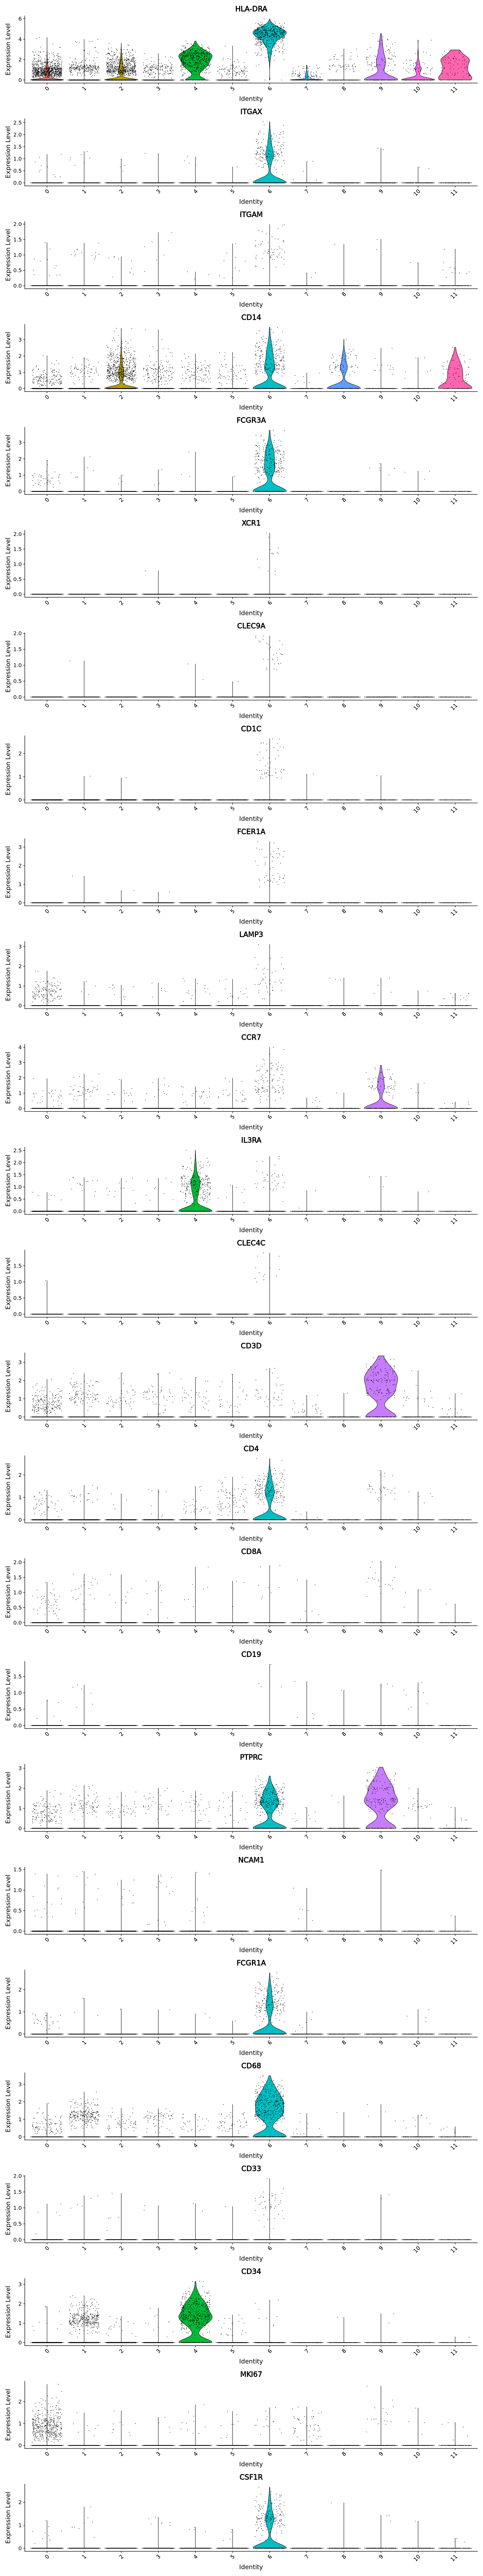

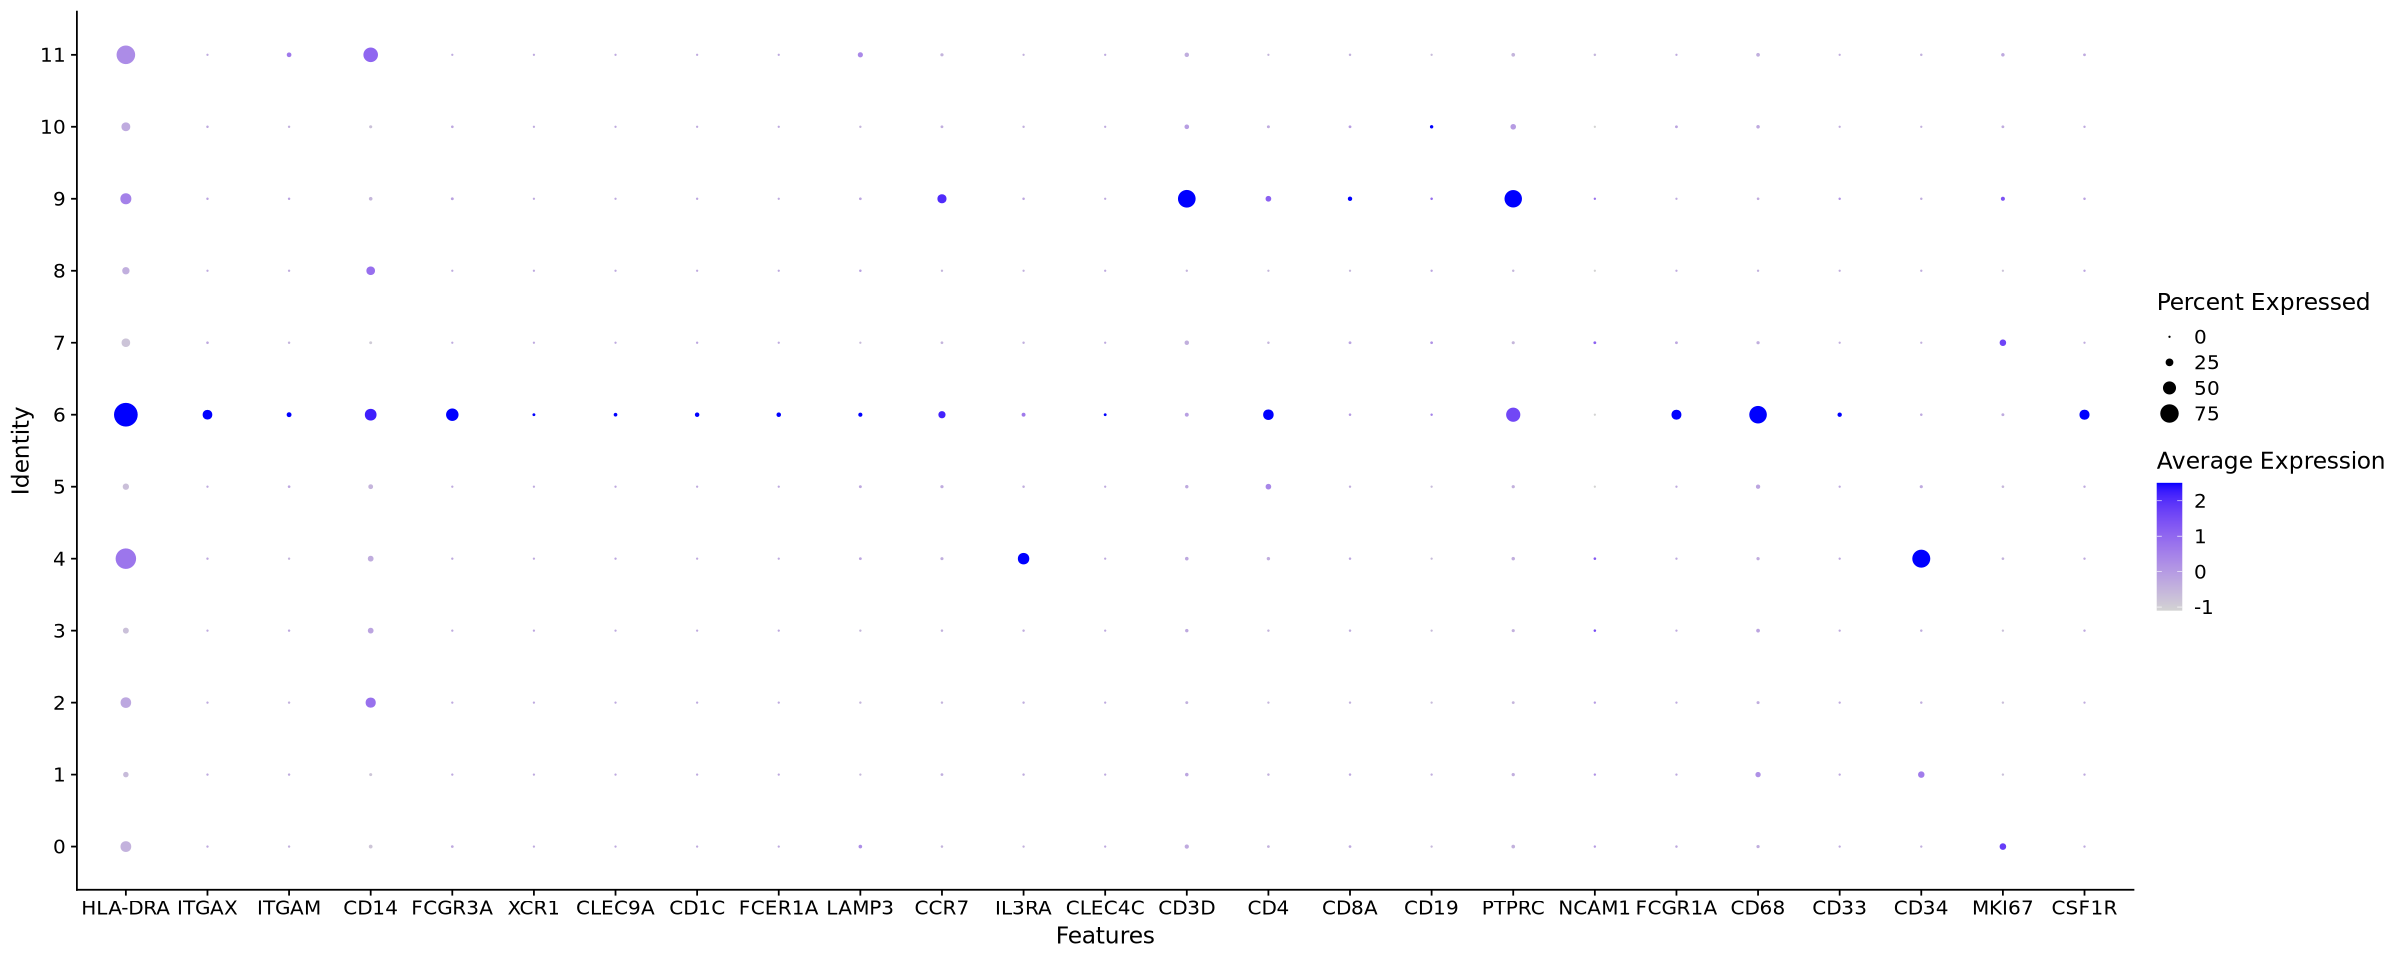

In [25]:
#Same genes over UMAP
options(repr.plot.height=6, repr.plot.width=8)
DimPlot(TNBC, reduction = "umap", label=TRUE)

options(repr.plot.height=30, repr.plot.width=20)
FeaturePlot(TNBC, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67", "CSF1R"), order = TRUE)

#Violin plots of classic markers
options(repr.plot.height=80, repr.plot.width=15)
VlnPlot(TNBC, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67", "CSF1R"), ncol=1)

#Same as above but dot plot
options(repr.plot.height=8, repr.plot.width=20)
DotPlot(TNBC, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67", "CSF1R"))

#### From above it looks like cluster 6 is the myeloid cells, now subsetting out this clusters

In [26]:
head(TNBC@meta.data)

orig.ident nCount_RNA nFeature_RNA
GSE199515_TNBC1_AAACCTGCACGGATAG-1 GSE199515   3229      1175        
GSE199515_TNBC1_AAACCTGGTAGCTGCC-1 GSE199515   3784      1326        
GSE199515_TNBC1_AAACCTGGTTAAGGGC-1 GSE199515   3929      1466        
GSE199515_TNBC1_AAACGGGCAGACAAAT-1 GSE199515   3511      1323        
GSE199515_TNBC1_AAACGGGTCGTAGGTT-1 GSE199515   3356      1058        
GSE199515_TNBC1_AAACGGGTCTGAAAGA-1 GSE199515  13527      2263        
                                   sample_type cancer_type patient_id
GSE199515_TNBC1_AAACCTGCACGGATAG-1 tumour      TNBC        TNBC1     
GSE199515_TNBC1_AAACCTGGTAGCTGCC-1 tumour      TNBC        TNBC1     
GSE199515_TNBC1_AAACCTGGTTAAGGGC-1 tumour      TNBC        TNBC1     
GSE199515_TNBC1_AAACGGGCAGACAAAT-1 tumour      TNBC        TNBC1     
GSE199515_TNBC1_AAACGGGTCGTAGGTT-1 tumour      TNBC        TNBC1     
GSE199515_TNBC1_AAACGGGTCTGAAAGA-1 tumour      TNBC        TNBC1     
                                   sample_id       percent.mt RNA_snn_res.0.2
GSE199515_TNBC1_AAACCTGCACGGATAG-1 GSE199515_TNBC1  1.982038  6              
GSE199515_TNBC1_AAACCTGGTAGCTGCC-1 GSE199515_TNBC1  4.149049  1              
GSE199515_TNBC1_AAACCTGGTTAAGGGC-1 GSE199515_TNBC1  2.697888  1              
GSE199515_TNBC1_AAACGGGCAGACAAAT-1 GSE199515_TNBC1  2.307035  1              
GSE199515_TNBC1_AAACGGGTCGTAGGTT-1 GSE199515_TNBC1  2.532777  6              
GSE199515_TNBC1_AAACGGGTCTGAAAGA-1 GSE199515_TNBC1 15.413617  11             
                                   seurat_clusters
GSE199515_TNBC1_AAACCTGCACGGATAG-1 6              
GSE199515_TNBC1_AAACCTGGTAGCTGCC-1 1              
GSE199515_TNBC1_AAACCTGGTTAAGGGC-1 1              
GSE199515_TNBC1_AAACGGGCAGACAAAT-1 1              
GSE199515_TNBC1_AAACGGGTCGTAGGTT-1 6              
GSE199515_TNBC1_AAACGGGTCTGAAAGA-1 11

In [27]:
myeloid_TNBC <- subset(TNBC, subset = RNA_snn_res.0.2 %in% c("6"))

In [28]:
TNBC
myeloid_TNBC

An object of class Seurat 
33694 features across 9206 samples within 1 assay 
Active assay: RNA (33694 features, 2000 variable features)
 7 layers present: counts.1, counts.2, counts.3, data.1, data.2, data.3, scale.data
 2 dimensional reductions calculated: pca, umap

An object of class Seurat 
33694 features across 499 samples within 1 assay 
Active assay: RNA (33694 features, 2000 variable features)
 7 layers present: counts.1, counts.2, counts.3, data.1, data.2, data.3, scale.data
 2 dimensional reductions calculated: pca, umap

In [29]:
saveRDS(myeloid_TNBC, "/scratch/user/s4436039/scdata/GSE199515/GSE199515_myeloid.RDS")

#### Following the above then need to move entire GSE199515 folder from scratch to rdm
``` bash
rsync -azvhp /scratch/user/s4436039/scdata/GSE199515/ /QRISdata/Q5935/nikita/scdata/GSE199515
```